# ***Importing the necessary modules***

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# ***importing the Dataset***

In [62]:
df=pd.read_csv("creditcard.csv",sep=",")

In [63]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0


# ***Data Exploring***

In [65]:
df.shape

(3973, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,...,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,...,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,...,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,...,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,...,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,...,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(23857, 31)

# ***Exploring the Data***

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)

In [ ]:
count_classes

0.0    23769
1.0       88
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

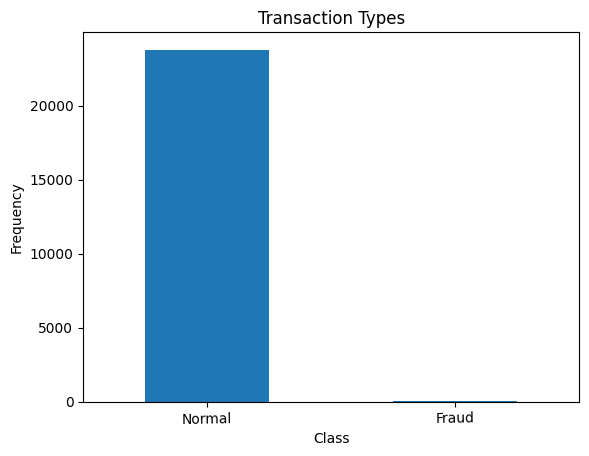

In [ ]:
count_classes.plot(kind = 'bar', rot=1)

plt.title("Transaction Types")

plt.xticks(range(2),["Normal","Fraud"])

plt.xlabel("Class")

plt.ylabel("Frequency")

# ***Splitting the Fraudulent and Normal Transaction Data***

In [ ]:
fraud_data=df[df["Class"]==1]
normal_data=df[df["Class"]==0]

In [ ]:
fraud_data.shape,normal_data.shape

((88, 31), (23769, 31))

In [ ]:
fraud_data.Amount.describe()

count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [66]:
normal_data.Amount.describe()

count    23769.000000
mean        73.880199
std        212.541174
min          0.000000
25%          6.000000
50%         18.110000
75%         65.850000
max       7879.420000
Name: Amount, dtype: float64

# *Exploring and finding the Difference in the Fradulent and Normal Data*

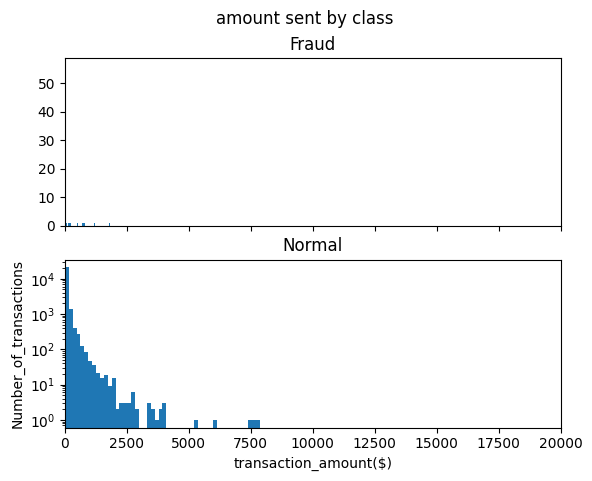

In [67]:
f,(plt1,plt2)=plt.subplots(2,1,sharex=True)
bins=50
f.suptitle("amount sent by class")
plt1.hist(fraud_data.Amount,bins= bins)
plt2.hist(normal_data.Amount,bins=bins)
plt1.set_title("Fraud")
plt2.set_title("Normal")
plt.xlabel("transaction_amount($)")
plt.ylabel("Number_of_transactions")
plt.xlim((0,20000))
plt.yscale("log")
plt.show()

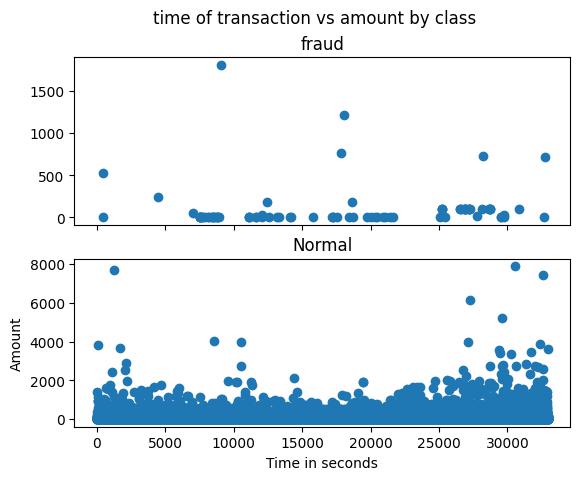

In [71]:
f,(plt1,plt2)=plt.subplots(2,1,sharex=True)
f.suptitle("time of transaction vs amount by class")
plt1.scatter(fraud_data.Time,fraud_data.Amount)
plt2.scatter(normal_data.Time,normal_data.Amount)
plt1.set_title("fraud")
plt2.set_title("Normal")
plt.xlabel("Time in seconds")
plt.ylabel("Amount")
plt.show()

In [72]:
outlier_fraction = len(fraud_data)/float(len(normal_data))

In [73]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud_data)))

print("Valid Cases : {}".format(len(normal_data)))

0.003702301316841264
Fraud Cases : 88
Valid Cases : 23769


In [74]:
corrmat=df.corr()

In [75]:
corrmat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.034126,0.038956,-0.014232,-0.131780,0.048145,-0.019297,0.033785,0.008118,0.060237,...,0.006948,0.112250,-0.062171,0.030976,-0.032618,-0.139501,0.040379,0.028836,-0.022292,-0.026490
V1,-0.034126,1.000000,-0.177482,-0.155385,0.141392,-0.095598,-0.053327,-0.111827,0.217367,-0.137889,...,-0.107679,-0.035479,-0.117819,-0.010236,0.329964,-0.006363,-0.110344,0.072929,-0.193212,-0.038919
V2,0.038956,-0.177482,1.000000,0.037304,-0.032587,0.126869,-0.062184,0.076108,-0.184420,0.067911,...,0.056882,-0.049579,0.092524,-0.014618,-0.146433,-0.097543,0.105530,-0.005378,-0.523143,-0.017326
V3,-0.014232,-0.155385,0.037304,1.000000,0.143481,-0.012809,-0.190782,-0.058875,0.082838,0.007582,...,0.015031,0.251921,0.001895,0.021887,-0.297368,0.064797,-0.174205,-0.172702,-0.276944,-0.025113
V4,-0.131780,0.141392,-0.032587,0.143481,1.000000,-0.154655,0.074271,-0.055965,0.071270,-0.247186,...,-0.059384,-0.042048,0.067612,-0.035672,-0.004629,0.151414,-0.097777,0.034671,0.119346,0.049523
V5,0.048145,-0.095598,0.126869,-0.012809,-0.154655,1.000000,0.055807,-0.199771,0.115946,0.026625,...,0.049681,-0.069871,-0.068664,-0.008488,-0.029711,-0.185407,-0.064963,-0.209775,-0.531119,0.008328
V6,-0.019297,-0.053327,-0.062184,-0.190782,0.074271,0.055807,1.000000,0.000048,-0.004021,-0.013225,...,0.021852,-0.019107,0.002644,-0.005774,0.075854,0.068036,0.031256,0.044459,0.299181,-0.022654
V7,0.033785,-0.111827,0.076108,-0.058875,-0.055965,-0.199771,0.000048,1.000000,0.169257,0.031965,...,-0.085942,0.061800,-0.093476,0.006648,-0.104721,-0.120063,0.010903,-0.009152,0.470766,-0.025777
V8,0.008118,0.217367,-0.184420,0.082838,0.071270,0.115946,-0.004021,0.169257,1.000000,-0.062438,...,-0.201049,0.047443,-0.145223,-0.041106,0.034292,0.064499,0.038105,0.075777,-0.086909,0.012711
V9,0.060237,-0.137889,0.067911,0.007582,-0.247186,0.026625,-0.013225,0.031965,-0.062438,1.000000,...,0.071035,0.087008,-0.105164,0.018062,0.139351,-0.056784,0.026929,-0.172574,-0.057835,-0.038498


In [77]:
top=corrmat.index


In [78]:
top

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

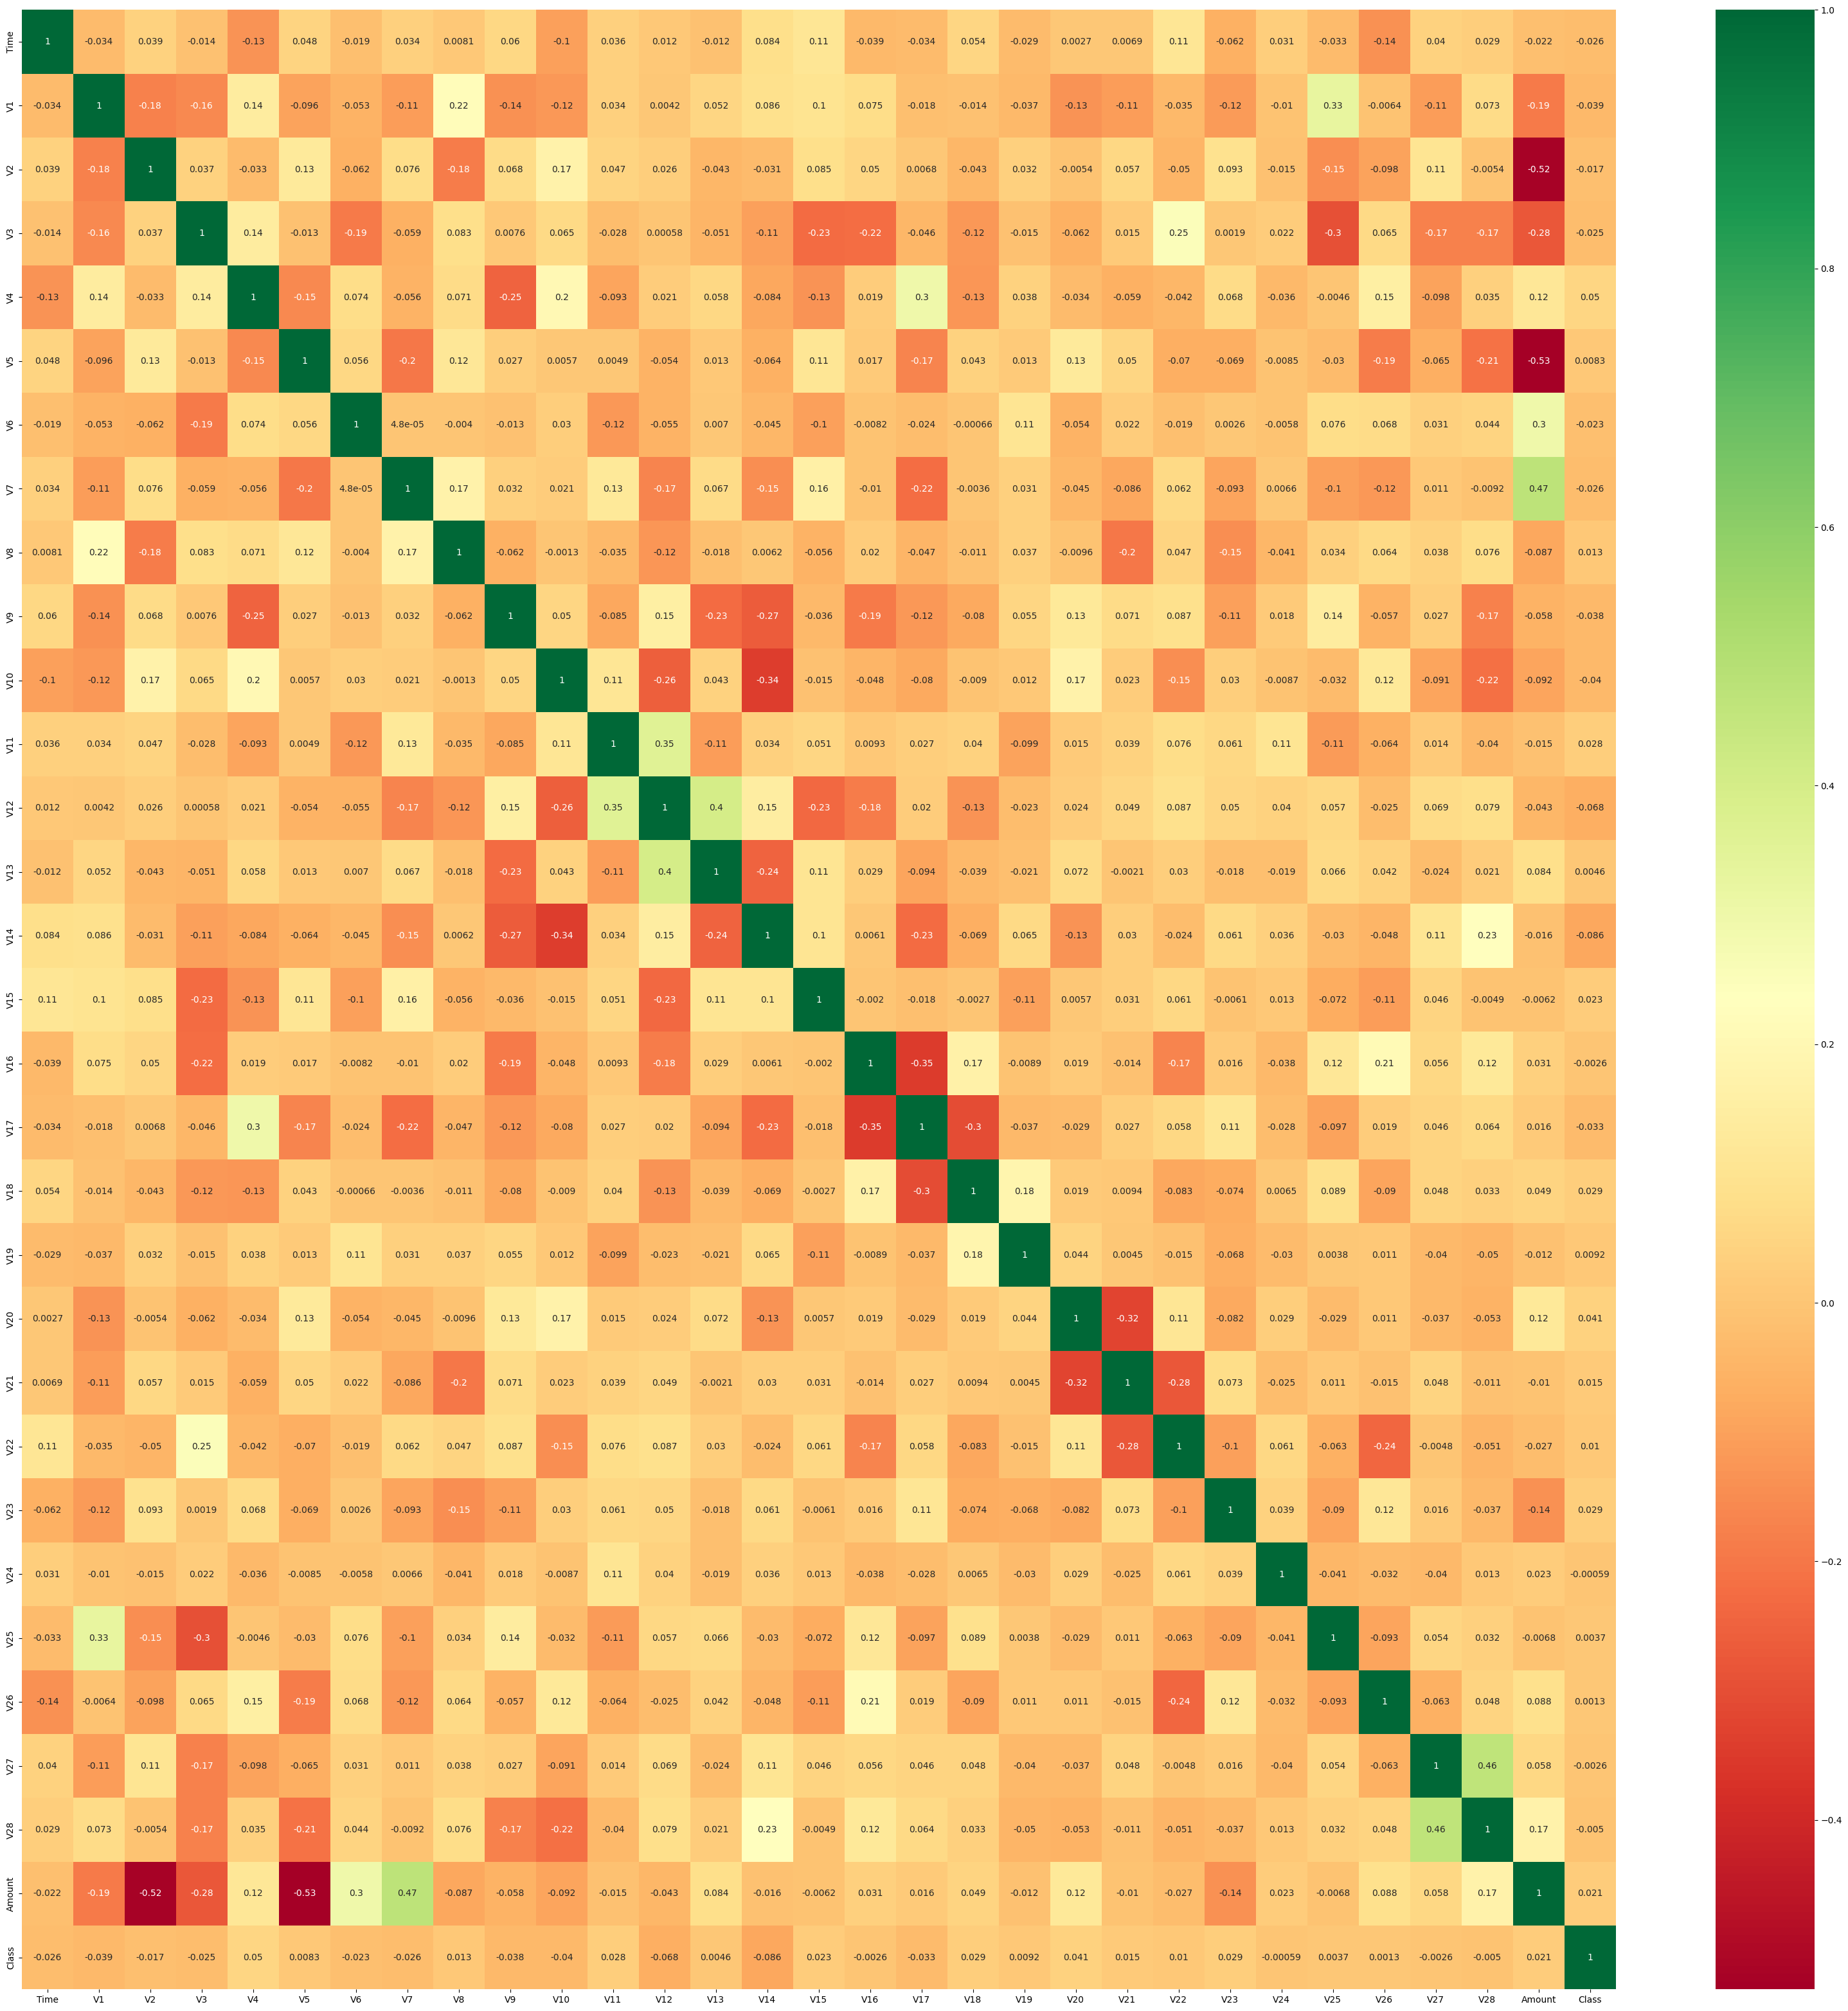

In [83]:
plt.figure(figsize=(40,40))
g=sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")

# ***Creating the col which are not equal to the target Class***

In [86]:
col=df.columns.tolist()
col=[c for c in col if c not in ["Class"]]

In [87]:
tar="Class"

In [91]:
state=np.random.RandomState(42)

In [92]:
state

RandomState(MT19937) at 0x7C4D5106E940

# *Independent Variable*

In [106]:
X=df[col]

# *Dependent Variable*

In [95]:
Y=df[tar]

In [96]:
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [97]:
X_outliers

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.51423444, 0.59241457,
        0.04645041],
       [0.60754485, 0.17052412, 0.06505159, ..., 0.19598286, 0.04522729,
        0.32533033],
       [0.38867729, 0.27134903, 0.82873751, ..., 0.63755747, 0.88721274,
        0.47221493],
       ...,
       [0.19122467, 0.99395139, 0.78743652, ..., 0.03369092, 0.28692661,
        0.38134984],
       [0.79184974, 0.39747853, 0.93966931, ..., 0.58121023, 0.6991239 ,
        0.91881996],
       [0.06378928, 0.06421102, 0.20552527, ..., 0.03997111, 0.24540144,
        0.49685021]])

# ***Creating the perfect parameters for the IsolationForest, Local Outlier Fraction, Support vector Machine***

In [125]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)}

# ***As there is an single missing value in the Class column I am going to replace the missing Data***

In [126]:
X.fillna(0,inplace=True)

<ipython-input-126-061a3725b486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0,inplace=True)


In [127]:
Y.fillna(0,inplace=True)

In [129]:
n_outliers = len(fraud_data)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 2
Accuracy Score :
0.9994966020639315
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3971
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      3973
   macro avg       0.50      0.50      0.50      3973
weighted avg       1.00      1.00      1.00      3973



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Local Outlier Factor: 17
Accuracy Score :
0.9957211175434181
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3971
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      3973
   macro avg       0.50      0.50      0.50      3973
weighted avg       1.00      1.00      1.00      3973

